# Stock Market Prediction And Forecasting Using Stacked LSTM

In [36]:
# Import the data 
import pandas as pd
df = pd.read_csv("drive/MyDrive/stock_market_forecast/AAPL.csv")

In [37]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [38]:
df1 = df.reset_index()["close"]

In [39]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

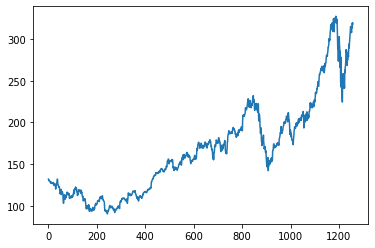

In [40]:
# Let's plot close values
import matplotlib.pyplot as plt
plt.plot(df1);

Note: You must ensure that the scale of your output variable matches the scale of the activation function (transfer function) on the output layer of your network. If your output activation function has a range of [0,1], then obviously you must ensure that the target values lie within that range.

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [42]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [43]:
# Let's split data into train and test sets
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size

train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [44]:
training_size, test_size

(880, 378)

In [45]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [46]:
test_data[:10]

array([[0.3657857 ],
       [0.36494132],
       [0.34598497],
       [0.355822  ],
       [0.35421768],
       [0.38250443],
       [0.37663599],
       [0.37254074],
       [0.39888542],
       [0.36456134]])

In [47]:
# Converting an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
  dataX = []
  datay = []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    datay.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(datay)

In [48]:
# reshape into X=t, t+1, t+2, t+3 and y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(tset_data, time_step)

In [49]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [50]:
X_test.shape, y_test.shape

((277, 100), (277,))

In [51]:
# reshape input to be [samples, time steps, features] which is reuired for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [52]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [53]:
# build a model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# Compile a model
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 193ms/step - loss: 0.0240 - val_loss: 0.0607
Epoch 2/100
13/13 [==============================] - 2s 124ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 3/100
13/13 [==============================] - 2s 124ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 4/100
13/13 [==============================] - 2s 124ms/step - loss: 8.2737e-04 - val_loss: 0.0049
Epoch 5/100
13/13 [==============================] - 2s 124ms/step - loss: 7.5103e-04 - val_loss: 0.0058
Epoch 6/100
13/13 [==============================] - 2s 124ms/step - loss: 7.0653e-04 - val_loss: 0.0064
Epoch 7/100
13/13 [==============================] - 2s 123ms/step - loss: 7.0990e-04 - val_loss: 0.0070
Epoch 8/100
13/13 [==============================] - 2s 125ms/step - loss: 6.8729e-04 - val_loss: 0.0064
Epoch 9/100
13/13 [==============================] - 2s 125ms/step - loss: 6.7523e-04 - val_loss: 0.0054
Epoch 10/100
13/13 [==============================] - 2s 124ms/step

In [56]:
# Predict and check perfomance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [57]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [58]:
# Calcualte RMSE performace metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

149.63879000959452

In [59]:
math.sqrt(mean_squared_error(y_test, test_predict))

247.16061949752154

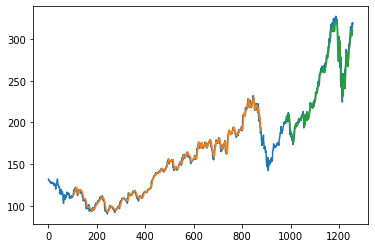

In [60]:
# Plot shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# Plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

378

In [68]:
X_input = test_data[278:].reshape(1,-1)
X_input.shape

(1, 100)

In [69]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [70]:
temp_input[:10]

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415]

In [71]:
# To demostrate the next 10 days of predictions
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):

  if(len(temp_input)>100):
    X_input = np.array(temp_input[1:])
    print("{} day time {}".format(i, X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1, n_steps, 1))
    yhat = model.predict(X_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1, n_steps, 1))
    yhat = model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1


print(lst_output)
    


[0.9467553]
101
1 day time [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90

In [72]:
day_new  = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [73]:
import matplotlib.pyplot as plt


In [74]:
len(df1)

1258

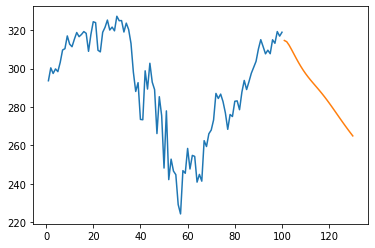

In [75]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

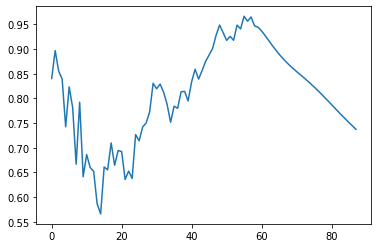

In [76]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [77]:
df3 = scaler.inverse_transform(df3).tolist()

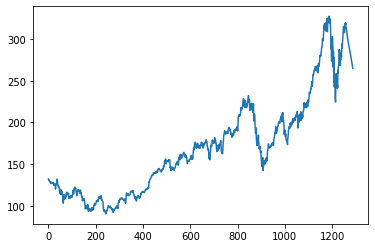

In [79]:
plt.plot(df3)